In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

from sympy import symbols, diff
import sympy

In [40]:
dt = 0.1

x0 = 0
y0= 0

TLOW = -100
THIGH = 1100

DT = int((1 / dt) *(THIGH - TLOW))

t = np.linspace(TLOW, THIGH, DT)

In [41]:
r=1
k= 1000
# h= 0

In [42]:
def X_dot(x,h,y):
    return (r*x*(1-(x/k))) - h

def Y_dot(x,y):
    return 1

In [43]:
# def euler(t, dt, order):
#     ans_x = [x0]
#     ans_y = [y0]

#     for i in range(1, DT):
#         if order == 1:
#             # first order
#             ans_y.append(ans_y[i-1] + dt*Y_dot(ans_x[i-1],ans_y[i-1]))
#             ans_x.append(ans_x[i - 1] + dt * X_dot(ans_x[i-1],ans_y[i-1]))
            
        
#     return ans_x, ans_y

In [44]:
x = np.linspace(TLOW, THIGH, DT)
xd1= X_dot(x,0,0)
xd2= X_dot(x,100,0)
xd3= X_dot(x,500,0)



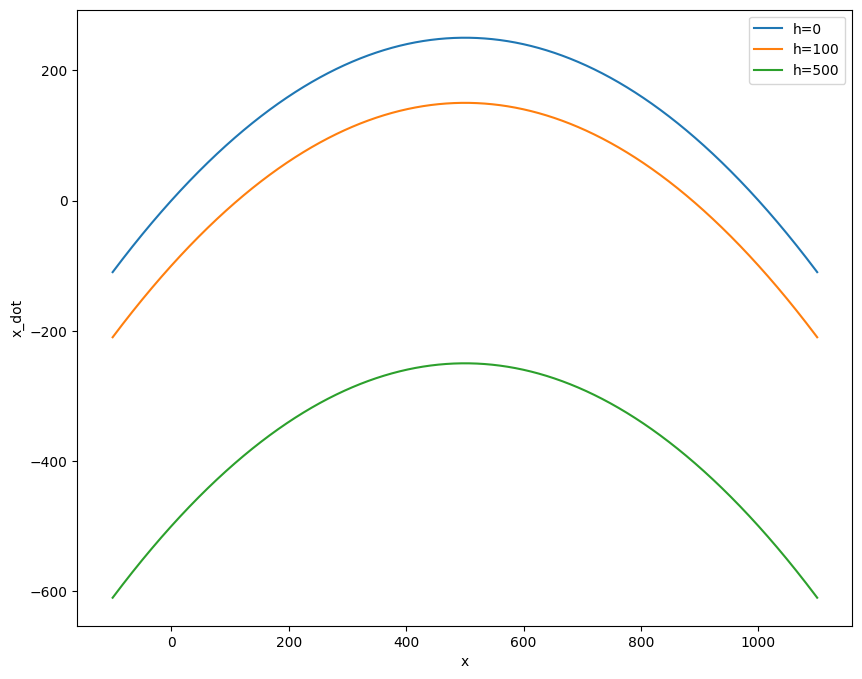

In [45]:
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('x_dot')
plt.plot(x, xd1, label='h=0')
plt.plot(x, xd2, label='h=100')
plt.plot(x, xd3, label='h=500')
plt.legend()
plt.show()